In [1]:
import itertools
from sklearn.metrics import confusion_matrix
### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix, cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test,rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Supress warnings
import warnings
warnings.filterwarnings("ignore")
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis ,QuadraticDiscriminantAnalysis
# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score,ShuffleSplit, cross_validate
# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score,roc_auc_score, roc_curve, auc, cohen_kappa_score
## To display all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df=pd.read_csv(r"C:\Users\sheet\Dropbox\PC\Downloads\autism_aults.csv")
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [6]:
df.shape

(704, 21)

In [7]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [8]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [9]:
df.replace("?",np.NaN,inplace=True)
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7.0,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [10]:
# Checking null data
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [11]:
df["age"] = pd.to_numeric(df["age"])
df['age'] = df['age'].fillna(df['age'].mean())
df.isnull().sum()
df

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7.0,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [12]:
df.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                47
gender              2
ethnicity          11
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            5
Class/ASD           2
dtype: int64

In [13]:
df=df.fillna(df.mode().iloc[0])


In [14]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [15]:
# Calculating the percentage of adults shows the symptoms of autisim
yes_autism= df[df['Class/ASD']=='YES']
no_autism= df[df['Class/ASD']=='NO']
print("adults_yes:",round(len(yes_autism)/len(df) * 100,2))
print("adults_no:",round(len(no_autism)/len(df) * 100,2))

adults_yes: 26.85
adults_no: 73.15


In [16]:
# Displaying the content of the target column
df['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

([<matplotlib.patches.Wedge at 0x21e3a11aaf0>,
 [Text(-0.8962982902881019, -0.7979031111774322, 'no_autism'),
  Text(0.8216068345770805, 0.7314111083215992, 'yes_autism')],
 [Text(-0.5228406693347261, -0.46544348152016873, '73.2%'),
  Text(0.4481491824965893, 0.3989515136299631, '26.8%')])

(-1.1974905851016608,
 1.1147095850980289,
 -1.185875041407965,
 1.1040892876860753)

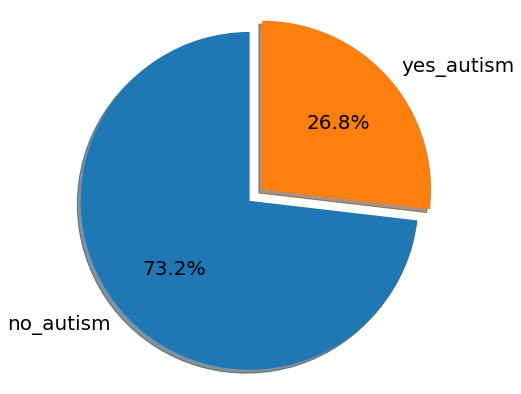

In [17]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.rcParams.update({'font.size': 20})
fig.set_size_inches(7,7)
plt.pie(df["Class/ASD"].value_counts(),labels=('no_autism','yes_autism'),explode = [0.1,0],autopct='%1.1f%%' ,shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

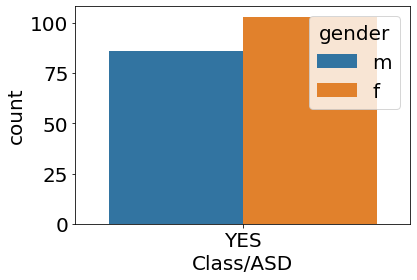

In [18]:
sns.countplot(x = 'Class/ASD', hue = 'gender', data = yes_autism)

<AxesSubplot:xlabel='age', ylabel='count'>

Text(0.5, 0, 'age')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '17.0'),
  Text(1, 0, '18.0'),
  Text(2, 0, '19.0'),
  Text(3, 0, '20.0'),
  Text(4, 0, '21.0'),
  Text(5, 0, '22.0'),
  Text(6, 0, '23.0'),
  Text(7, 0, '24.0'),
  Text(8, 0, '25.0'),
  Text(9, 0, '26.0'),
  Text(10, 0, '27.0'),
  Text(11, 0, '28.0'),
  Text(12, 0, '29.0'),
  Text(13, 0, '30.0'),
  Text(14, 0, '31.0'),
  Text(15, 0, '32.0'),
  Text(16, 0, '33.0'),
  Text(17, 0, '34.0'),
  Text(18, 0, '35.0'),
  Text(19, 0, '36.0'),
  Text(20, 0, '37.0'),
  Text(21, 0, '38.0'),
  Text(22, 0, '39.0'),
  Text(23, 0, '40.0'),
  Text(24, 0, '42.0'),
  Text(25, 0, '43.0'),
  Text(26, 0, '44.0'),
  Text(27, 0, '45.0'),
  Text(28, 0, '46.0'),
  Text(29, 0, '47.0'),
  Text(30, 0, '49.0'),
  Text(31, 0, '51.0'),
  Text(32, 0, '53.0'),
  Text(33, 0, '55.0'),
  Text(34, 0, '56.0'),
  Text(35, 0, '58.0'),


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Age distribution of ASD positive in Adult')

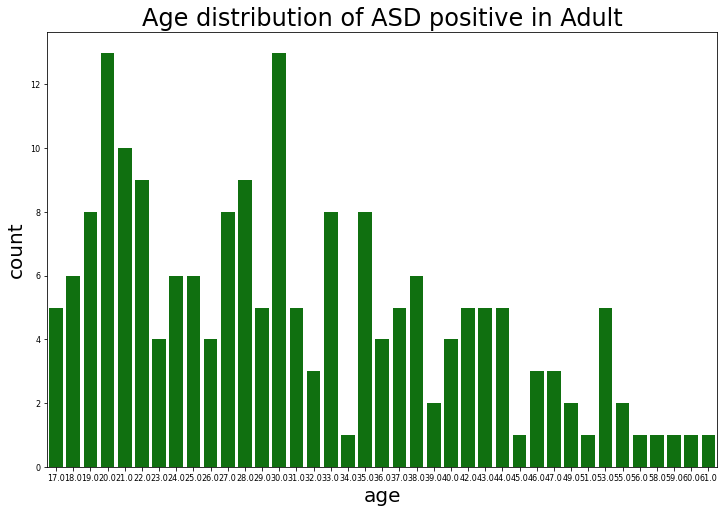

In [20]:
#Visualizing the age distribution of Positive ASD in adult
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="age", data=yes_autism, color="g");
ax.set_xlabel('age')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.set_title('Age distribution of ASD positive in Adult')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Class/ASD', ylabel='count'>

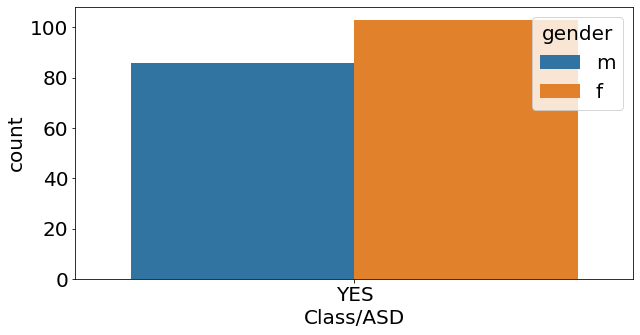

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Class/ASD', hue = 'gender', data = yes_autism)

<Figure size 864x432 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

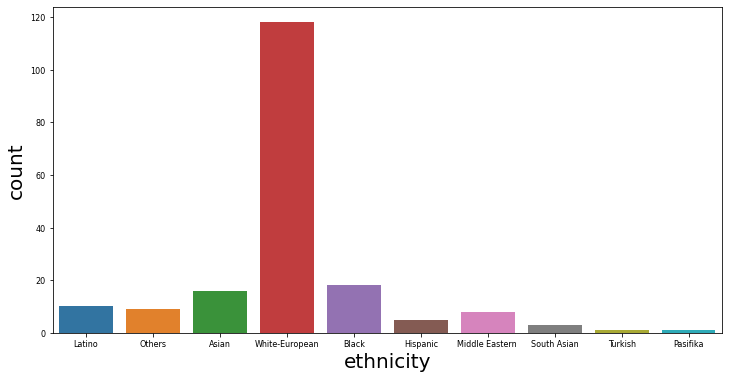

In [23]:
plt.figure(figsize = (12,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.countplot(x = 'ethnicity', data = yes_autism)

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='ethnicity', ylabel='count'>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD In Adult')

Text(0.5, 0, 'Ethnicity')

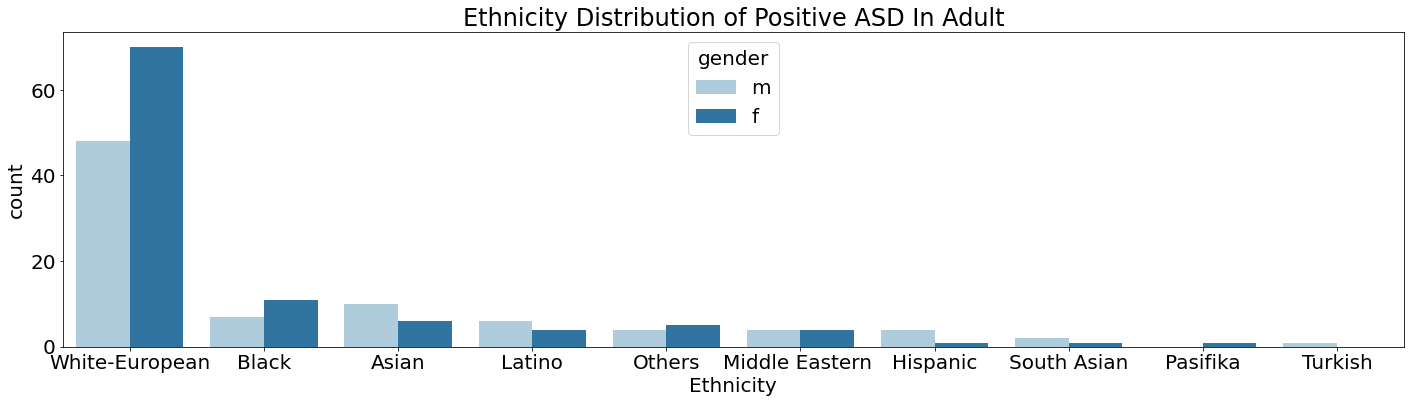

In [25]:
# visualize positive ASD based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='ethnicity',data=yes_autism,order= yes_autism['ethnicity'].value_counts().index[:11],hue='gender',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD In Adult')
plt.xlabel('Ethnicity')
plt.tight_layout()

In [26]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
yes_autism['ethnicity'].value_counts()

White-European     118
Black               18
Asian               16
Latino              10
Others               9
Middle Eastern       8
Hispanic             5
South Asian          3
Pasifika             1
Turkish              1
Name: ethnicity, dtype: int64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

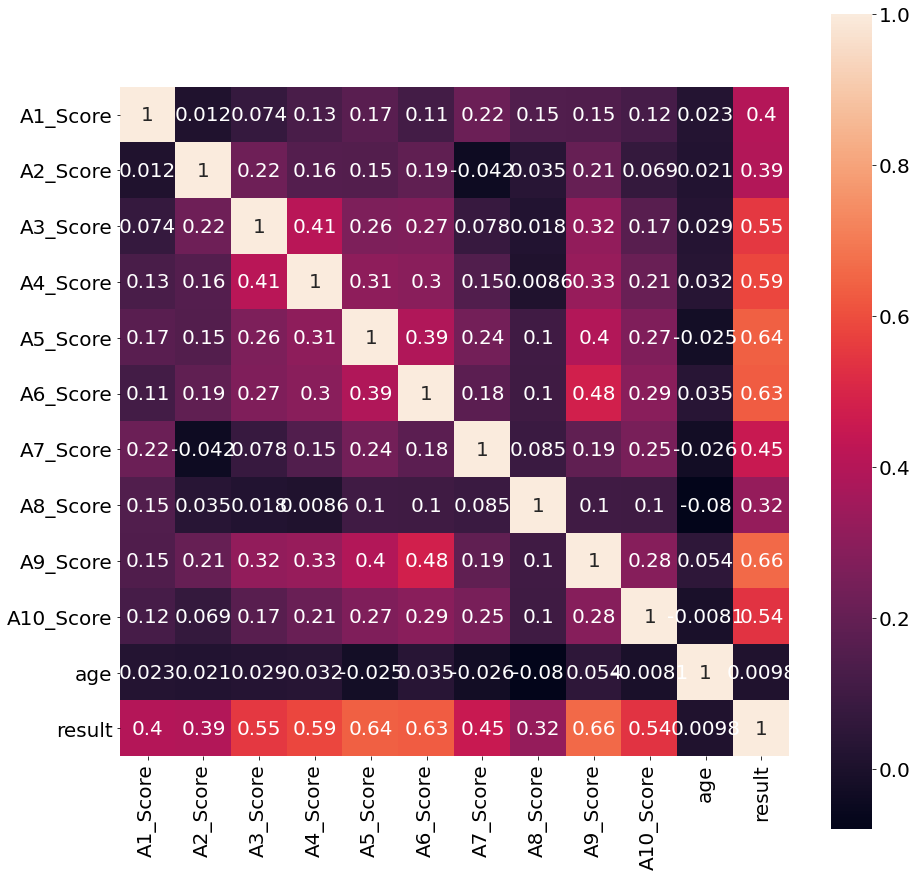

In [27]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

In [28]:
df.drop(['result'],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              704 non-null    float64
 11  gender           704 non-null    int32  
 12  ethnicity        704 non-null    int32  
 13  jundice          704 non-null    int32  
 14  austim           704 non-null    int32  
 15  contry_of_res    704 non-null    int32  
 16  used_app_before  704 non-null    int32  
 17  age_desc        

In [31]:
X = df.drop(['Class/ASD'], axis = 1)
y = df['Class/ASD']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size = .80)

RandomForestRegressor()

RF Accuracy Score is :  0.7943262411347518
Model: RF
------------------------------------------------------------


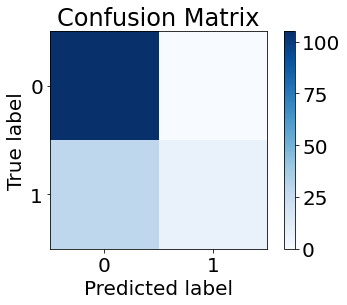

test accuracy: 0.79
train accuracy: 0.81
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0  1  All
Actual                
0          105  0  105
1           29  7   36
All        134  7  141

test report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       105
           1       1.00      0.19      0.33        36

    accuracy                           0.79       141
   macro avg       0.89      0.60      0.60       141
weighted avg       0.84      0.79      0.74       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       410
           1       1.00      0.31      0.48       153

    accuracy                           0.81       563
   macro avg       0.90      0.66      0.68       563
weighted avg  

KNeighborsClassifier()

KNN Accuracy Score is :  0.8226950354609929
Model: KNN
------------------------------------------------------------


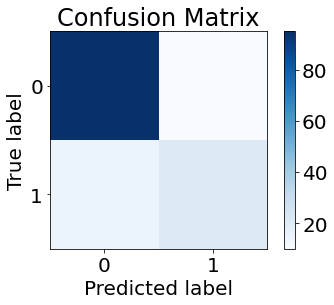

test accuracy: 0.82
train accuracy: 0.84
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0           95  10  105
1           15  21   36
All        110  31  141

test report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.68      0.58      0.63        36

    accuracy                           0.82       141
   macro avg       0.77      0.74      0.76       141
weighted avg       0.82      0.82      0.82       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       410
           1       0.76      0.63      0.69       153

    accuracy                           0.84       563
   macro avg       0.81      0.78      0.79       563
weighted 

SVC()

SVM Accuracy Score is :  0.7446808510638298
Model: SVM
------------------------------------------------------------


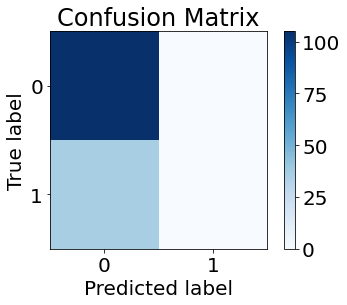

test accuracy: 0.74
train accuracy: 0.73
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0  All
Actual             
0          105  105
1           36   36
All        141  141

test report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       105
           1       0.00      0.00      0.00        36

    accuracy                           0.74       141
   macro avg       0.37      0.50      0.43       141
weighted avg       0.55      0.74      0.64       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       410
           1       0.00      0.00      0.00       153

    accuracy                           0.73       563
   macro avg       0.36      0.50      0.42       563
weighted avg       0.53      

LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


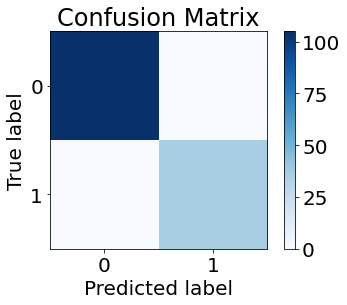

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          105   0  105
1            0  36   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        36

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       153

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted av

GaussianNB()

NB Accuracy Score is :  0.9858156028368794
Model: NB
------------------------------------------------------------


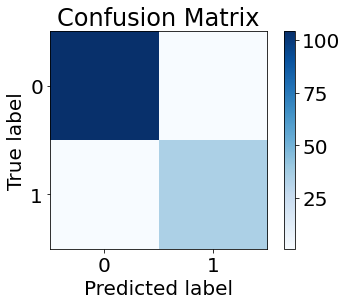

test accuracy: 0.99
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          104   1  105
1            1  35   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       410
           1       0.91      0.95      0.93       153

    accuracy                           0.96       563
   macro avg       0.94      0.96      0.95       563
weighted 

In [34]:
models = []
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', (accuracy_score(y_test, y_hat_test)))
    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

SVC()

SVM Accuracy Score is :  1.0
Model: SVM
------------------------------------------------------------


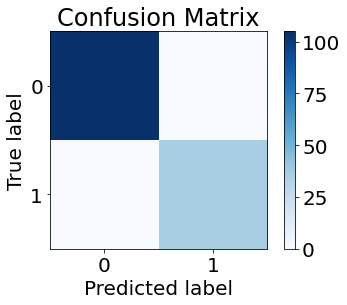

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          105   0  105
1            0  36   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        36

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       0.99      1.00      1.00       153

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted av

LogisticRegression()

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


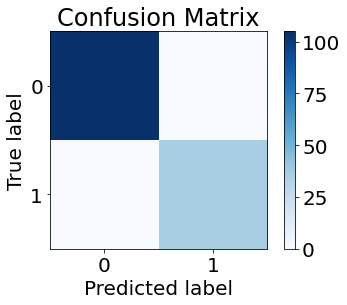

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          105   0  105
1            0  36   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        36

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       153

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted av

KNeighborsClassifier()

KNN Accuracy Score is :  0.9858156028368794
Model: KNN
------------------------------------------------------------


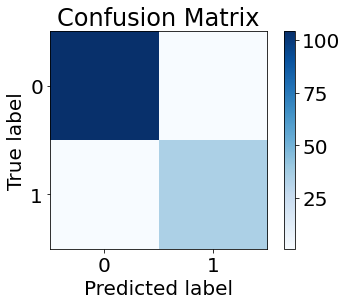

test accuracy: 0.99
train accuracy: 0.98
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          104   1  105
1            1  35   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       410
           1       0.95      0.99      0.97       153

    accuracy                           0.98       563
   macro avg       0.97      0.98      0.98       563
weighted 

GaussianNB()

NB Accuracy Score is :  0.9858156028368794
Model: NB
------------------------------------------------------------


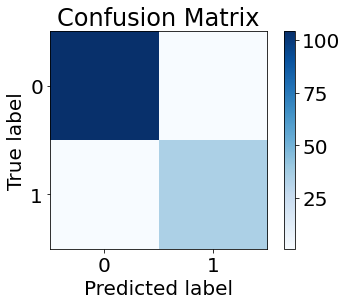

test accuracy: 0.99
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          104   1  105
1            1  35   36
All        105  36  141

test report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.97      0.97      0.97        36

    accuracy                           0.99       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.99      0.99      0.99       141

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       410
           1       0.91      0.95      0.93       153

    accuracy                           0.96       563
   macro avg       0.94      0.96      0.95       563
weighted 

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
models = []
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_hat_test = model.predict(X_test_scaled).astype(int)
    y_hat_train = model.predict(X_train_scaled).astype(int)
    print(name, 'Accuracy Score is : ', (accuracy_score(y_test, y_hat_test)))
    metrics(name, y_train, y_test, y_hat_train, y_hat_test)

In [38]:
for name, model in models:
    y_hat_test = model.predict(X_test_scaled).astype(int)
    y_hat_train = model.predict(X_train_scaled).astype(int)
    print(name, 'Accuracy Score is : ',( accuracy_score(y_test, y_hat_test)))

SVM Accuracy Score is :  1.0
LR Accuracy Score is :  1.0
KNN Accuracy Score is :  0.9858156028368794
NB Accuracy Score is :  0.9858156028368794


In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [40]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
logreg = LogisticRegression(solver='lbfgs', max_iter=100)
sfs = SFS(LogisticRegression(),k_features=(1,18),forward=False,floating=False,scoring = 'accuracy',cv = 5)

In [41]:
sfs.fit(X_train_scaled, y_train)
sfs.k_feature_names_

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 18), scoring='accuracy')

('A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'jundice',
 'austim',
 'used_app_before',
 'age_desc',
 'relation')

In [42]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
logreg.fit(X_train_sfs, y_train)
y_pred = logreg.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

LogisticRegression()

Test set accuracy: 100.00 %


In [43]:
svc=SVC(kernel="linear")
sfs12 = SFS(svc,k_features=9,
forward=False,
floating=False,
scoring='accuracy',
cv=5)
sfs12 = sfs12.fit(X_train_scaled, y_train)

In [44]:
print('Selected features:', sfs12.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 8, 9)


In [45]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs12.transform(X_train_scaled)
X_test_sfs = sfs12.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
svc.fit(X_train_sfs, y_train)
y_pred = svc.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

SVC(kernel='linear')

Test set accuracy: 97.87 %


In [46]:
mod=GaussianNB(priors=None, var_smoothing=1e-09)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(mod,k_features=15,forward=False,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [47]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17)


In [48]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
mod.fit(X_train_sfs, y_train)
y_pred = mod.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

GaussianNB()

Test set accuracy: 98.58 %


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(knn,k_features=16,forward=False,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [51]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17)


In [52]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_sfs, y_train)
y_pred = knn.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

KNeighborsClassifier()

Test set accuracy: 97.87 %


In [54]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
sfs1 = SFS(rf,k_features=10,forward=False,floating=False,scoring='accuracy',cv=5)
sfs1 = sfs1.fit(X_train_scaled, y_train)

In [55]:
print('Selected features:', sfs1.k_feature_idx_)

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


In [56]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]
X_train_sfs = sfs1.transform(X_train_scaled)
X_test_sfs = sfs1.transform(X_test_scaled)
# Fit the estimator using the new feature subset
# and make a prediction on the test data
rf.fit(X_train_sfs, y_train)
y_pred = rf.predict(X_test_sfs)
# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc * 100))

RandomForestClassifier(random_state=42)

Test set accuracy: 98.58 %
